In [ ]:
!pip install -q -U google-generativeai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import pandas as pd
from PIL import Image
from tqdm import tqdm
import time  # Import time module for delay
import google.generativeai as genai

In [ ]:
# import getpass
# import os

# os.environ["GOOGLE_API_KEY"] = ""


# # Check if GOOGLE_API_KEY is not already set
# if "GOOGLE_API_KEY" not in os.environ:
#     # Prompt for the API key securely
#     os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter Google API Key: ")

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
model1 = genai.GenerativeModel('gemini-1.0-pro-latest')
model2 = genai.GenerativeModel('gemini-1.5-flash-latest')

def process_image(image_path, prompt):
    try:
        # Open the image and generate the initial description
        img = Image.open(image_path)
        prompt1 = '''provide me all the information about texture of the design how it is looking and design of the input textile image in descriptive format
        It should provide like this Texture Details: , Design Details: and Placement of shapes and design:  overall description of image '''
        # prompt1 = f'''Describe the image '''
        response1 = model2.generate_content([prompt1, img], stream=False)
        response1.resolve()
        initial_description = response1.text
        print(initial_description)
        img.close()

        # Enhance the prompt based on the initial description and user inputs
        prompt2 = f'''First, identify and prioritize the user's specifications provided in the prompt: {prompt}. Understand the image's texture, structure, colors,placement, and shapes: {initial_description}. Now, generate a detailed prompt that places greater emphasis on the user inputs while incorporating image texture, structure, colors,placement, and shapes. This new prompt will help generate a new image with the SDXL model. Emphasize the distinct texture and style elements that define the image's character.The prompt should be fewer than 80 tokens; curate it carefully. provide it in describe format only'''
        # prompt2 = f
        response2 = model1.generate_content([prompt2], stream=False)
        response2.resolve()

        return response2.text
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

In [ ]:
image_path="/content/minimal_1296.jpg"
user_input="generate a design variation"
description=process_image(image_path,user_input)
print(description)

Texture Details: The image has a variety of textures, including stripes, squares, circles, and wavy lines. Some of the textures are solid, while others are filled with patterns. The textures are used to create a visually interesting and diverse pattern.

Design Details: The design is made up of a variety of geometric shapes, including circles, squares, and interlocking loops. The shapes are arranged in a seemingly random pattern, but there is a sense of balance and harmony to the overall design. The use of negative space is also a key element of the design, helping to create a sense of airiness and lightness.

Placement of shapes and design: The shapes in the image are arranged in a scattered, but balanced fashion. They are distributed evenly across the surface, giving the design a sense of rhythm and flow. The different shapes and textures create a sense of depth and movement, and the overall effect is one of playfulness and energy.

Overall description of image: The image is a playfu

In [ ]:
image_path="/content/abstract_3084.jpg"
user_input="Generate similar desing variation"
description=process_image(image_path,user_input)
print(description)

Texture Details: The texture is a watercolor wash, creating a slightly blurred and faded effect. The color is a warm, golden brown, reminiscent of aged paper or leather.

Design Details: The design is a repeating pattern of stylized stars, formed by intersecting lines. The lines are thick and slightly uneven, suggesting they were created with a brush. Each star is centered within a square grid, creating a sense of order and symmetry. 

Overall Description: The image is a simple yet elegant pattern, with a vintage, rustic feel. The warm brown color and watercolor texture give it a sense of warmth and depth, while the grid pattern adds a touch of formality. It could be used as a background, for fabric, or as a decorative element. 

Generate a similar design variation with a watercolor wash texture in warm golden brown hues, reminiscent of aged paper or leather. Create a repeating pattern of stylized stars formed by intersecting lines. Ensure the lines are thick and slightly uneven, as if

In [ ]:
image_path="/content/minimal_1296.jpg"
user_input="Generate similar desing variation"
description=process_image(image_path,user_input)
print(description)

Texture Details: The image has a white background with various geometric shapes in brown and blue. The shapes are filled with patterns like zigzags, concentric circles, and stripes. The overall texture is modern and geometric. 

Design Details: The design features a repeating pattern of various geometric shapes. Some shapes are simple outlines like the 4-leaf clover and some are filled in with patterns like the concentric circles. The colors used are brown and blue, which gives the design a modern and minimalist look.

Overall Description: The image is a simple yet elegant design that uses a combination of geometric shapes and patterns to create a visually appealing pattern. The repeating pattern is well-balanced and the colors used create a harmonious look. The white background makes the design easy to use for various purposes like textile printing, website backgrounds, and more. 

Generate a similar design, maintaining the modern geometric theme with a white background. Keep the repe

In [ ]:
image_path="/content/minimal_1387.jpg"
user_input="Generate similar desing variation"
description=process_image(image_path,user_input)
print(description)

Texture Details: The image has a textured look, with a woven or knitted fabric effect. The texture is subtle and creates a visual depth and richness. The texture is uniform throughout the design.

Design Details: The design is geometric, featuring a repeating pattern of squares and triangles. The shapes are arranged in a symmetrical pattern, creating a sense of order and balance. There are four distinct colors: a brown, a light beige, a darker beige, and a pink color. The colors are muted and earthy, creating a calm and sophisticated feel.

Overall Description: The image is an abstract pattern that combines geometric shapes and a textured surface. The design is subtle and understated, making it versatile for various applications. The earthy tones and geometric design create a sense of calm and sophistication.
Generate an abstract pattern that combines geometric shapes and a textured surface. Include subtle changes to the design that enhance its uniqueness and visual appeal. Maintain th

In [ ]:
image_path="/content/4 (1).jpg"
user_input="same design in cyan blue and sage green color"
description=process_image(image_path,user_input)
print(description)

The textile image features a wavy, abstract design. The background is a soft gradient of blue and gray, with a blurred effect. Overlaid on the background are thin, wavy lines in shades of blue, light blue, and tan. The lines create a sense of depth and movement, resembling a topographic map or the swirling patterns of agate stone. The texture of the image is smooth and fluid, with the lines blending seamlessly into the background. The overall effect is calming and ethereal.
Create a cyan blue and sage green version of this textile design, maintaining the same wavy, abstract design, but adding your own creative touches to make it unique and visually appealing. Keep the overall feel and theme of the design consistent.


In [ ]:
image_path="/content/3 (1).jpg"
user_input="Same design in multiple shades of pastel colors"
description=process_image(image_path,user_input)
print(description)

The image is a seamless pattern of overlapping, wavy, organic shapes reminiscent of topographic maps. The design creates a three-dimensional effect, as if the shapes are layers that are folded and stacked on top of each other. The base color is a deep dark green, with some shapes in brown and gray. Each shape has a white outline that gives it a distinct appearance.  The overlapping shapes create a feeling of depth and movement, while the contrasting colors add visual interest. Overall, the texture of the image is smooth and flowing, with a slight gradient effect that adds to its depth.
Wavy, organic shapes, reminiscent of topographic maps, overlap and stack upon each other to create a three-dimensional effect. Each distinct shape is outlined in white, and the base color is pastel green. Use multiple shades of pastel colors to create a seamless pattern with a smooth, gradient effect that adds depth and movement. Maintain the overall feel and theme of the design while incorporating subtl

In [ ]:
image_path="/content/5.jpg"
user_input="A textile variation in yellow, orange, brown"
description=process_image(image_path,user_input)
print(description)

Texture Details: The image has a textured appearance, resembling a woven fabric. There is a subtle linen-like weave, with horizontal and vertical threads creating a slightly raised effect. The texture is consistent throughout the image, adding depth and visual interest to the geometric shapes.

Design Details: The design consists of overlapping geometric shapes, primarily squares, rectangles, and arcs. The shapes are arranged in a dynamic and abstract pattern, with a sense of movement and depth created by the layering.  The colors are muted and earthy, including off-white, black, grey, and a warm brown. The colors are used to create contrast and highlight the different levels of the design.

Overall Description: The image presents a modern and abstract design,  combining geometric shapes and a textured background for a sophisticated and visually engaging composition. The interplay of light and shadow on the shapes, enhanced by the textured surface, creates a sense of depth and dimensio

In [ ]:
image_path="/content/6.jpg"
user_input="pattern variation in shades of pink"
description=process_image(image_path,user_input)
print(description)

Texture Details: The texture is a watercolor effect, creating a soft and slightly fuzzy look. The shapes appear to have been painted with watercolors, resulting in a subtle, uneven texture.

Design Details: The design features a pattern of overlapping, irregularly shaped forms in shades of green. The shapes range from rounded and oval to more rectangular and angular, creating a visually dynamic composition.

Overall Description: The image is a subtle and sophisticated design. The muted green tones and organic shapes create a sense of calm and serenity. The watercolor texture adds a touch of artistry and depth to the overall design. The pattern is well-suited for use in a variety of applications, from textiles and home decor to stationery and artwork. 

Create a pattern variation of the image, using shades of pink and preserving the watercolor texture. Maintain the soft, organic feel and sense of calm, while introducing subtle changes to the shape and composition of the forms to enhance

In [ ]:
image_path="/content/7.jpg"
user_input="similar design in mustard yellow, khakhi brown, and black"
description=process_image(image_path,user_input)
print(description)

Texture Details: The image has a textured look, created by brushstrokes. The brushstrokes are bold and expressive, giving the design a hand-painted quality. The strokes are layered to create depth and dimension, which contributes to the texture of the design.

Design Details: The design is composed of overlapping, abstract shapes that resemble circles or ovals. The shapes are drawn with bold, expressive brushstrokes, which gives the design a dynamic and energetic feel. The shapes are scattered throughout the image, creating a sense of movement and energy. The use of negative space also adds to the design's dynamism. The color palette is simple, featuring black, grey, and tan, which creates a sense of sophistication.

Overall Description: The image is a visually interesting and abstract design, featuring a bold, expressive aesthetic. The use of brushstrokes creates a textured look and feel, giving the design a hand-painted quality. The overlapping shapes create a dynamic and energetic f

In [ ]:
for m in genai.list_models():
    print(m)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

TypeError: Model.__init__() got an unexpected keyword argument 'max_temperature'

In [ ]:
import google.generativeai as genai
model = genai.GenerativeModel('gemini-1.5-flash-latest')

In [ ]:
# Function to generate description for an image
def generate_description(image_path):
    try:
        img = Image.open(image_path)
        prompt = '''provide me all the information about texture of the design how it is looking and design of the input textile image in descriptive format
        It should provide like this Texture Details: , Design Details: and overall description of image  '''
        response = model.generate_content([prompt, img], stream=False)
        response.resolve()
        description = response.text
        img.close()
        return description
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

In [ ]:
# Function to generate description for an image
def generate_description(image_path):
    try:
        img = Image.open(image_path)
        prompt = '''Describe the image '''
        response = model.generate_content([prompt, img], stream=False)
        response.resolve()
        description = response.text
        img.close()
        return description
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

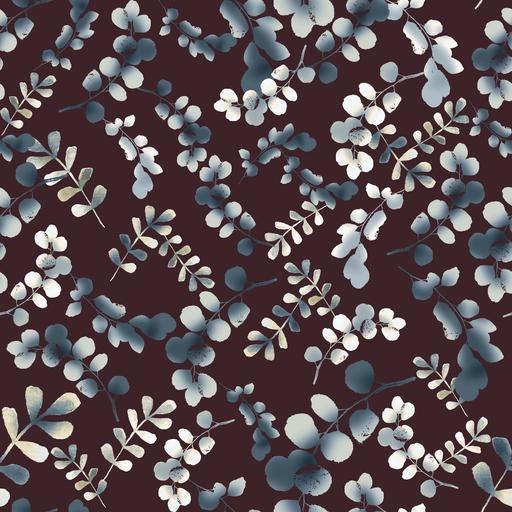

In [ ]:
from PIL import Image

image_path = "/content/Floral_10.jpg"

# Open the image using PIL
image1 = Image.open(image_path)

# Display the image
image1

In [ ]:
# image_path="/content/Original Style _ Tiles to Inspire.jpeg"

des1 = generate_description(image_path)
des1

'Texture Details: The texture of the design is a soft, watercolor-like effect. The leaves and branches are slightly blurred, giving the design a delicate and ethereal feel. \n\nDesign Details: The design features a repeating pattern of stylized leaves and branches. The leaves are various shapes and sizes, with some being rounded and others more elongated. The branches are thin and delicate, creating a sense of movement and flow. The color scheme is muted, with a soft, silvery gray on a deep burgundy background.\n\nOverall Description: The overall design is a soft and sophisticated pattern. The subtle texture and muted color palette create a calming and elegant feel. The design would be well-suited for a variety of applications, such as home décor, fashion accessories, or stationery. \n'

In [ ]:
des2 = generate_description(image_path)
des2

'The image is a geometric pattern of intersecting lines and squares. The background is black, and the lines and squares are in shades of green and beige. The lines are textured, giving the appearance of a woven fabric. The squares are arranged in a grid-like pattern, with some squares partially obscured by the intersecting lines. The overall effect is a modern and abstract design that is both intricate and eye-catching.'

In [ ]:
model2 = genai.GenerativeModel('gemini-1.0-pro-latest')
def enhance_prompt(text, user_input):
    prompt = f'''First, identify the user's specifications provided in the prompt. User Inputs: {user_input}.
    Understand the image details: {text}. Now, generate a detailed prompt that combines the user inputs with the image details in a suitable way.
    This new prompt will help generate a new image with the SDXL model. The prompt should be fewer than 100 tokens; curate it carefully.
    If the user wants variations in design, pattern, or specified colors, the output should incorporate these elements.and refer following prompt to create new output.Add design keywords in output
    Create a new design variation based on the provided pattern. Retain key characteristics such as shape, structure, and artistic texture,
    but rearrange these elements in a unique and innovative way. Ensure that the new composition is visually distinct from the original while preserving its artistic integrity.
    Capture the category of the image, such as geometric, floral, abstract, waves, dots, or any other style, and mimic the style and texture accordingly. For example, if the image has a watercolor texture, the variation should also be the same; if the image has an embroidery style, the variation should also be the same.
    Focus on maintaining the theme and the overall feel of the design, incorporating subtle changes that enhance its uniqueness and visual appeal.'''
    # prompt = """First, identify the user's specifications provided in the prompt. User Inputs: {user_input}. Understand the image details: {text}. Now, generate a detailed prompt that combines the user inputs with the image details in a suitable way. This new prompt will help generate a new image with the SDXL model. The prompt should be fewer than 100 tokens; curate it carefully. If the user wants variations in design, pattern, or specified colors, the output should incorporate these elements. Additionally, identify the category of the original image, such as geometric, floral, abstract, waves, dots, or any other style. The new variation should mimic the original style and texture accordingly. For example, if the original image has a watercolor texture, the variation should also have a watercolor texture; if the original has an embroidery style, the variation should also reflect this style. Focus on maintaining the theme, artistic integrity, and overall feel of the design, incorporating subtle changes that enhance its uniqueness and visual appeal."""
    response = model2.generate_content([prompt], stream=False)
    response.resolve()
    description = response.text
    return description

In [ ]:
user_inputs1="image in shades of emerald green and sky blue"

In [ ]:
enhance_prompt(des1,user_inputs1)

'Design an image that has soft watercolor-like effects. Use emerald green and sky blue as the primary colors with a repeating pattern of leaves and branches. The texture should be blurred, creating a delicate and ethereal feel.'

In [ ]:
user_inputs= "Retain same pattern with acru base color, all over pattern with yellow and black dots"

In [ ]:
user_inputs2="Retain the structure, pastel colors and different pattern"

In [ ]:
user_input3="Image with red ,powder blue and white colors"

In [ ]:
# def enhance_prompt(text, user_input):
#   prompt = f'''First identify what user have specified in the prompt what he needs to do with the image based on the user inputs User inputs: {user_input}.
#   Understand the Image details{text}, Now Provide a detail prompt that will combine user inputs with image details in suitable way. This new prompt will help us generate a new image with help of SDXL model. The prompt should be less then 100 tokens curate it carefully.
#   If user wants to vartions in design, pattern refer following deatils for generating the output also if user metioned the colors user input output shoul have that colors
#   Create a new design variation based on the provided pattern. Retain key characteristics such as shape, structure, and artistic texture, but rearrange these elements in a unique and innovative way. Ensure that the new composition is visually distinct from the original while preserving its artistic integrity. Focus on maintaining the theme and the overall feel of the design, incorporating subtle changes that enhance its uniqueness and visual appeal.'''
#   response = model2.generate_content([prompt], stream=False)
#   response.resolve()
#   description = response.text
#   return description

In [ ]:
enhance_prompt(des,user_inputs)

'Generate a geometric pattern image, using the provided image as a base. The new pattern should retain the same overall structure of triangles and squares, but with a different color scheme. The base color should be azure, and the pattern should be made up of yellow and black dots. Ensure that the texture of the new image matches the smooth, flat texture of the original image. Additionally, make sure that the overall design remains simple and modern, with a bold contrast between the azure base and the yellow and black dots.'

In [ ]:
enhance_prompt(des,user_inputs1)

'Generate a geometric pattern with pastel colors. The pattern should be made up of triangles and squares. The triangles should be arranged in a repeating pattern, and the squares should be placed in the center of each triangle. The overall effect should be smooth and flat.'

In [ ]:
enhance_prompt(des,user_inputs2)

'Create a geometric pattern of triangles and squares, with a smooth, flat texture. The triangles should be arranged in a repeating pattern, and the squares should be placed in the center of each triangle. The colors should be pastel, such as light pink, blue, yellow, and green. Retain the structure of the original image, but make the colors softer and more muted. The new image should be suitable for use as wallpaper, fabric, or home décor.'

In [ ]:
enhance_prompt(des,user_input3)

'Generate a geometric pattern image with a smooth, flat texture. The image should be made up of triangles and squares. The colors of the image should be black, white, and yellow. The black and white triangles should be arranged in a checkerboard pattern, and the yellow squares should be placed in the center of each black triangle. The overall effect should be a repeating pattern.'

In [ ]:
def enhance_prompt(text, user_input):
  prompt=f"""First identify what user have specified in the prompt what he needs to do with the image based on the user inputs {user_input}.
Understand the Image details{text},Now Provide a detail prompt that will combine user inputs with image details in suitable way and make necessary changes. This new prompt will help us generate a new image with help of SDXL model. The prompt should be less then 100 tokens curate it carefully so that user needs will be fulfilled."""
  response = model2.generate_content([prompt], stream=False)
  response.resolve()
  description = response.text
  return description

In [ ]:
def enhance_prompt(text, user_input):
  prompt=""" Identify the shapes in the input image and create a completely new design by re-arranging the shapes in a unique and innovative way. Ensure the new composition is distinct from the original, but maintain the artistic texture
I need you to understand following details i am provideing and then get the keywords from it and add  in proper way in above prompt so that i can generate variation of the image using that prompt the new prompt should be of same size
example how output should look like """
  enhance = f"user inputs :{user_input} + prompt + text"
  response = model2.generate_content([enhance], stream=False)
  response.resolve()
  description = response.text
  return description


In [ ]:
enhance_prompt(des)

'Identify the shapes in the input image and create a completely new design by re-arranging the shapes in a unique and innovative way. Ensure the new composition is distinct from the original, but maintain the artistic texture and dark, moody color scheme. The new design should be a seamless pattern, with the design repeating itself over and over again.'